In [394]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [395]:
df2016 = pd.read_csv("Analyses/Final Data.csv", encoding = 'iso-8859-1')
df2015 = pd.read_csv("Analyses/2015 Data.csv", encoding = 'iso-8859-1')
df2014 = pd.read_csv("Analyses/2014 Data.csv", encoding = 'iso-8859-1')

In [396]:
#limits 2016 and 2015 data to only buildings that should be analyzed (excludes duplicates, outliers, etc.). 2014 data was already cleaned.
df2016 = df2016[df2016['Include in Data Analysis'] == 1]
df2015 = df2015[df2015['analyze'] == 1]

In [397]:
#makes all data numeric except for proterty type
for col in df2016:
    if col == 'Primary Property Type Category - Reduced':
        pass
    else:
        df2016[col] = pd.to_numeric(df2016[col], errors = 'coerce')

In [398]:
#makes all data numeric except for proterty type
for col in df2015:
    if col == 'Primary Property Type Category - Reduced':
        pass
    else:
        df2015[col] = pd.to_numeric(df2015[col], errors = 'coerce')

In [399]:
#makes all data numeric except for proterty type
for col in df2014:
    if col == 'Primary Property Type Category - Reduced':
        pass
    else:
        df2014[col] = pd.to_numeric(df2014[col], errors = 'coerce')

In [400]:
#calculates medians for building types. Also counts number of buildings in each type.
results_2016 = (df2016[['Primary Property Type Category - Reduced', 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)', 
                        'Weather Normalized Site EUI (kBtu/ft2)']].groupby('Primary Property Type Category - Reduced').median()
                )
count_results_2016 = (df2016[['Primary Property Type Category - Reduced', 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)', 
                        'Weather Normalized Site EUI (kBtu/ft2)']].groupby('Primary Property Type Category - Reduced').count()
                )

#merges two above dataframes so that medians also have building counts. drops two unneeded columns and renames the other.
merged_results_2016 = pd.merge(left=count_results_2016, right=results_2016, left_index=True, right_index=True)
merged_results_2016 = merged_results_2016.drop(['ENERGY STAR Score_x', 'Weather Normalized Source EUI (kBtu/ft2)_x'], axis = 1)
(merged_results_2016.rename(columns = {'Weather Normalized Site EUI (kBtu/ft2)_x': 'Building Count', 
                                      'ENERGY STAR Score_y': 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)_y': 
                                      'Weather Normalized Source EUI (kBtu/ft2)', 'Weather Normalized Site EUI (kBtu/ft2)_y':
                                      'Weather Normalized Site EUI (kBtu/ft2)'}, inplace = True)
 )

In [401]:
#calculates medians for building types. Also counts number of buildings in each type.
results_2015 = (df2015[['Primary Property Type Category - Reduced', 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)', 
                        'Weather Normalized Site EUI (kBtu/ft2)']].groupby('Primary Property Type Category - Reduced').median()
                )
count_results_2015 = (df2015[['Primary Property Type Category - Reduced', 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)', 
                        'Weather Normalized Site EUI (kBtu/ft2)']].groupby('Primary Property Type Category - Reduced').count()
                )

#merges two above dataframes so that medians also have building counts. drops two unneeded columns and renames the other.
merged_results_2015 = pd.merge(left=count_results_2015, right=results_2015, left_index=True, right_index=True)
merged_results_2015 = merged_results_2015.drop(['ENERGY STAR Score_x', 'Weather Normalized Source EUI (kBtu/ft2)_x'], axis = 1)
(merged_results_2015.rename(columns = {'Weather Normalized Site EUI (kBtu/ft2)_x': 'Building Count', 
                                      'ENERGY STAR Score_y': 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)_y': 
                                      'Weather Normalized Source EUI (kBtu/ft2)', 'Weather Normalized Site EUI (kBtu/ft2)_y':
                                      'Weather Normalized Site EUI (kBtu/ft2)'}, inplace = True)
 )

In [402]:
#calculates medians for building types. Also counts number of buildings in each type.
results_2014 = (df2014[['Primary Property Type Category - Reduced', 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)', 
                        'Weather Normalized Site EUI (kBtu/ft2)']].groupby('Primary Property Type Category - Reduced').median()
                )
count_results_2014 = (df2014[['Primary Property Type Category - Reduced', 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)', 
                        'Weather Normalized Site EUI (kBtu/ft2)']].groupby('Primary Property Type Category - Reduced').count()
                )

#merges two above dataframes so that medians also have building counts. drops two unneeded columns and renames the other.
merged_results_2014 = pd.merge(left=count_results_2014, right=results_2014, left_index=True, right_index=True)
merged_results_2014 = merged_results_2014.drop(['ENERGY STAR Score_x', 'Weather Normalized Source EUI (kBtu/ft2)_x'], axis = 1)
(merged_results_2014.rename(columns = {'Weather Normalized Site EUI (kBtu/ft2)_x': 'Building Count', 
                                      'ENERGY STAR Score_y': 'ENERGY STAR Score', 'Weather Normalized Source EUI (kBtu/ft2)_y': 
                                      'Weather Normalized Source EUI (kBtu/ft2)', 'Weather Normalized Site EUI (kBtu/ft2)_y':
                                      'Weather Normalized Site EUI (kBtu/ft2)'}, inplace = True)
 )

In [403]:
def make_stupid_code(dataframes, category):
    columns = dataframes[0].columns
    for i, df in enumerate(dataframes):
        try:
            dataframes[i] = pd.DataFrame(df.loc[category]).transpose()
        except:
            dataframes[i] = pd.DataFrame(columns=columns)

    return dataframes[0].append(dataframes[1]).append(dataframes[2])

In [409]:
health_df = make_stupid_code([merged_results_2014, merged_results_2015, merged_results_2016], 'Healthcare')
k12_df = make_stupid_code([merged_results_2014, merged_results_2015, merged_results_2016], 'K-12 school')
lodging_df = make_stupid_code([merged_results_2014, merged_results_2015, merged_results_2016], 'Lodging')
multifam_df = make_stupid_code([merged_results_2014, merged_results_2015, merged_results_2016], 'Multifamily Housing')
office_df = make_stupid_code([merged_results_2014, merged_results_2015, merged_results_2016], 'Office')
other_df = make_stupid_code([merged_results_2014, merged_results_2015, merged_results_2016], 'Other')
retail_df = make_stupid_code([merged_results_2014, merged_results_2015, merged_results_2016], 'Retail')
university_df = make_stupid_code([merged_results_2014, merged_results_2015, merged_results_2016], 'University')

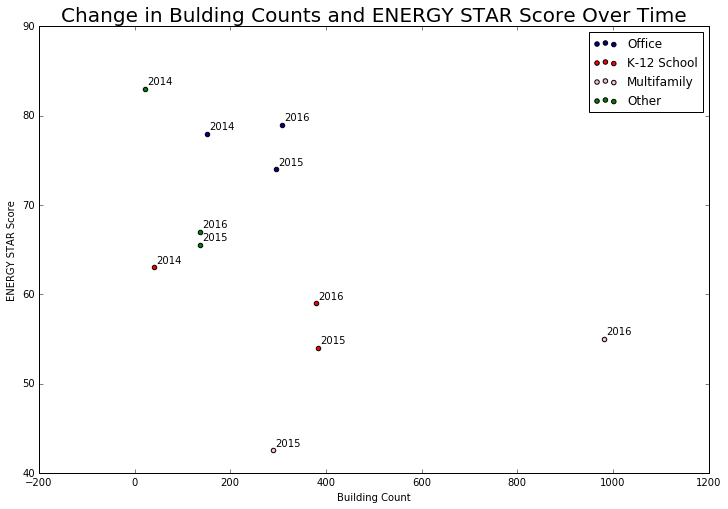

In [405]:
# Makes ENERGY STAR score scatter plot
axoffice = office_df.plot.scatter(x = 'Building Count', y = 'ENERGY STAR Score', color = 'DarkBlue', label = 'Office', figsize = (12,8))
axk12 = k12_df.plot.scatter(x = 'Building Count', y = 'ENERGY STAR Score', color = 'Red', label = 'K-12 School', ax = axoffice)
axmultifam = multifam_df.plot.scatter(x = 'Building Count', y = 'ENERGY STAR Score', color = 'Pink', label = 'Multifamily', ax = axk12)
axother = other_df.plot.scatter(x = 'Building Count', y = 'ENERGY STAR Score', color = 'Green', label = 'Other', ax = axmultifam)
plt.title('Change in Bulding Counts and ENERGY STAR Score Over Time', size = 20)

# Creates function to label points on scatter plot
def labeler(axthing, df_name, metric):
    # axthing = nume of subplot on scatter plot. E.g. axoffice.
    # df_name = building type dataframe created above that was used to plot points on scatter plot.
    # metric = y-value of scatter plot. E.g. ENERGY STAR score.
    year_index_list = [('2014',0), ('2015',1), ('2016',2)]
    for year, num in year_index_list:
        (axthing.annotate(year, xy=(df_name['Building Count'].iloc[num], df_name[metric].iloc[num]), 
                          xytext = (df_name['Building Count'].iloc[num] + 5, df_name[metric].iloc[num] + 0.5)))

labeler(axoffice, office_df, 'ENERGY STAR Score')
labeler(axk12, k12_df, 'ENERGY STAR Score')
labeler(axother, other_df, 'ENERGY STAR Score')

# Had to label multifamily separately because there were no data for multifamily in 2014.
axmultifam.annotate('2015', xy=(289, 42.5), xytext=(294, 43))
axmultifam.annotate('2016', xy=(982, 55), xytext=(987, 55.5))

plt.savefig('Analysis 42 ES score scatter.png')

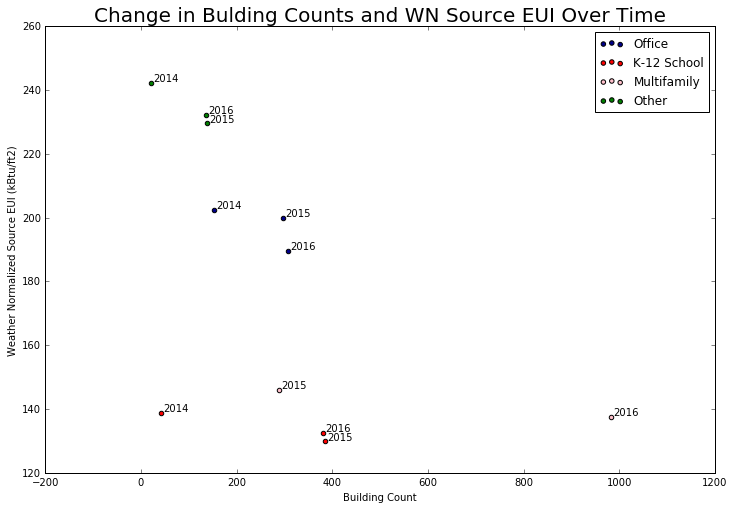

In [406]:
# Makes WN Source EUI scatter plot
axoffice = office_df.plot.scatter(x = 'Building Count', y = 'Weather Normalized Source EUI (kBtu/ft2)', color = 'DarkBlue', label = 'Office', figsize = (12,8))
axk12 = k12_df.plot.scatter(x = 'Building Count', y = 'Weather Normalized Source EUI (kBtu/ft2)', color = 'Red', label = 'K-12 School', ax = axoffice)
axmultifam = multifam_df.plot.scatter(x = 'Building Count', y = 'Weather Normalized Source EUI (kBtu/ft2)', color = 'Pink', label = 'Multifamily', ax = axk12)
axother = other_df.plot.scatter(x = 'Building Count', y = 'Weather Normalized Source EUI (kBtu/ft2)', color = 'Green', label = 'Other', ax = axmultifam)
plt.title('Change in Bulding Counts and WN Source EUI Over Time', size = 20)

labeler(axoffice, office_df, 'Weather Normalized Source EUI (kBtu/ft2)')
labeler(axk12, k12_df, 'Weather Normalized Source EUI (kBtu/ft2)')
labeler(axother, other_df, 'Weather Normalized Source EUI (kBtu/ft2)')

# Had to label multifamily separately because there were no data for multifamily in 2014.
axmultifam.annotate('2015', xy=(289, 145.9), xytext=(294, 146.5))
axmultifam.annotate('2016', xy=(982, 137.65), xytext=(987, 138))

plt.savefig('Analysis 42 WN Source scatter.png')

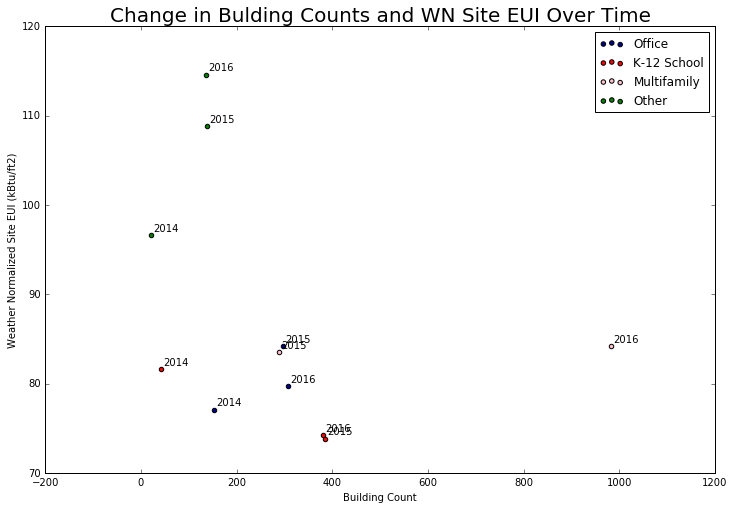

In [407]:
# Makes WN Site EUI scatter plot
axoffice = office_df.plot.scatter(x = 'Building Count', y = 'Weather Normalized Site EUI (kBtu/ft2)', color = 'DarkBlue', label = 'Office', figsize = (12,8))
axk12 = k12_df.plot.scatter(x = 'Building Count', y = 'Weather Normalized Site EUI (kBtu/ft2)', color = 'Red', label = 'K-12 School', ax = axoffice)
axmultifam = multifam_df.plot.scatter(x = 'Building Count', y = 'Weather Normalized Site EUI (kBtu/ft2)', color = 'Pink', label = 'Multifamily', ax = axk12)
axother = other_df.plot.scatter(x = 'Building Count', y = 'Weather Normalized Site EUI (kBtu/ft2)', color = 'Green', label = 'Other', ax = axmultifam)
plt.title('Change in Bulding Counts and WN Site EUI Over Time', size = 20)

labeler(axoffice, office_df, 'Weather Normalized Site EUI (kBtu/ft2)')
labeler(axk12, k12_df, 'Weather Normalized Site EUI (kBtu/ft2)')
labeler(axother, other_df, 'Weather Normalized Site EUI (kBtu/ft2)')

# Had to label multifamily separately because there were no data for multifamily in 2014.
axmultifam.annotate('2015', xy=(289, 83.5), xytext=(294, 84))
axmultifam.annotate('2016', xy=(982, 84.15), xytext=(987, 84.6))

plt.savefig('Analysis 42 WN Site scatter.png')

In [408]:
merged_results_2014.to_csv('2014 trend results.csv')
merged_results_2015.to_csv('2015 trend results.csv')
merged_results_2016.to_csv('2016 trend results.csv')